In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/flight.csv')

In [3]:
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
41307,9211,6/14/2011,4/28/2012,Male,4,dongguan,guangdong,CN,39.0,3/31/2014,...,1623.0,9915,1/6/2014,86,88.285714,180.0,0,0.618385,30853.0,29.0
21408,47527,4/27/2007,8/6/2007,Male,4,wuhan,hubei,CN,47.0,3/31/2014,...,16084.0,23595,3/28/2014,4,13.086957,62.0,0,0.700767,16372.0,0.0
30763,42128,11/5/2011,1/3/2012,Male,4,zhuhai,guangdong,CN,60.0,3/31/2014,...,4690.0,19643,3/9/2014,23,49.083333,238.0,0,0.518138,20493.0,22.0
58148,20634,4/26/2008,4/28/2008,Male,4,shanghai,shanghai,CN,40.0,3/31/2014,...,1724.0,4421,6/15/2013,291,41.333333,94.0,0,0.585528,1627.0,0.0
25353,22738,7/10/2010,6/19/2012,Male,4,guangzhou,guangdong,CN,59.0,3/31/2014,...,7764.0,16135,3/25/2014,7,53.750000,170.0,0,0.830379,12264.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70045 entries, 0 to 70044
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          70045 non-null  int64  
 1   FFP_DATE           70045 non-null  object 
 2   FIRST_FLIGHT_DATE  70045 non-null  object 
 3   GENDER             70042 non-null  object 
 4   FFP_TIER           70045 non-null  int64  
 5   WORK_CITY          67542 non-null  object 
 6   WORK_PROVINCE      66450 non-null  object 
 7   WORK_COUNTRY       70017 non-null  object 
 8   AGE                69584 non-null  float64
 9   LOAD_TIME          70045 non-null  object 
 10  FLIGHT_COUNT       70045 non-null  int64  
 11  BP_SUM             70045 non-null  int64  
 12  SUM_YR_1           69493 non-null  float64
 13  SUM_YR_2           69907 non-null  float64
 14  SEG_KM_SUM         70045 non-null  int64  
 15  LAST_FLIGHT_DATE   70045 non-null  object 
 16  LAST_TO_END        700

In [5]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2503
WORK_PROVINCE        3595
WORK_COUNTRY           28
AGE                   461
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              552
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              1
Point_NotFlight         1
dtype: int64

In [6]:
df.duplicated().sum()

7056

In [7]:
num = df.select_dtypes(include=['int64', 'float64'])
cat = df.select_dtypes(include=['object'])

#Handling Missing Value

In [8]:
nan_rows = df[df.isnull().any(axis=1)]
nan_rows.sample(10)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
65618,17161,4/12/2012,4/16/2012,Male,4,shenyangshi,liaoningsheng,CN,31.0,3/31/2014,...,0.0,2710,4/20/2012,712,4.000000,4.0,0,0.550000,954.0,0.0
32119,3377,11/30/2009,6/22/2010,Male,4,WEITERSTADT,NaN,DE,67.0,3/31/2014,...,6539.0,9804,9/23/2013,191,35.500000,129.0,0,0.969422,9948.0,0.0
58263,53588,3/30/2005,3/30/2005,Male,4,shanghai,shanghai,CN,53.0,3/31/2014,...,NaN,3053,8/29/2013,216,41.000000,41.0,0,0.842303,3731.0,11.0
5542,31383,3/10/2010,3/10/2010,Male,4,guangzhou,NaN,CN,30.0,3/31/2014,...,19425.0,45862,3/22/2014,10,19.888889,68.0,1,0.702084,29248.0,1.0
1693,12225,5/11/2010,5/12/2010,Male,5,NaN,beijing,CN,36.0,3/31/2014,...,18781.0,80298,3/16/2014,16,12.275862,86.0,2,0.703298,51463.0,7.0
68275,155,12/29/2010,11/20/2013,Female,4,NaN,beijing,CN,32.0,3/31/2014,...,1120.0,1947,3/9/2014,23,55.000000,103.0,0,0.533333,854.0,0.0
48645,2011,11/13/2004,11/13/2004,Male,4,beijingshi,NaN,CN,46.0,3/31/2014,...,4053.0,7394,12/18/2013,105,37.250000,98.0,0,0.581891,2503.0,0.0
789,11015,11/25/2004,7/23/2005,Male,4,dongjingdu,NaN,JP,69.0,3/31/2014,...,30465.0,82721,3/22/2014,10,22.033333,85.0,0,0.934580,87556.0,3.0
9543,41019,9/6/2012,9/11/2012,Male,4,NaN,NaN,SG,64.0,3/31/2014,...,3226.0,32803,11/17/2013,136,18.782609,136.0,0,0.691901,15204.0,0.0
61687,47509,7/2/2007,8/17/2007,Male,4,shanghai,shanghai,CN,48.0,3/31/2014,...,0.0,2748,7/11/2012,630,58.000000,58.0,0,0.750000,1695.0,0.0


In [9]:
df.dropna(subset=['GENDER','WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY'], inplace=True)

In [10]:
df['SUM_YR_1'].fillna(df['SUM_YR_1'].mean(), inplace=True)
df['SUM_YR_2'].fillna(df['SUM_YR_2'].mean(), inplace=True)

In [11]:
df['AGE'].interpolate(inplace=True)
df['AGE'] = df['AGE'].astype(int)

In [12]:
df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           1
Point_NotFlight      1
dtype: int64

#Univariate

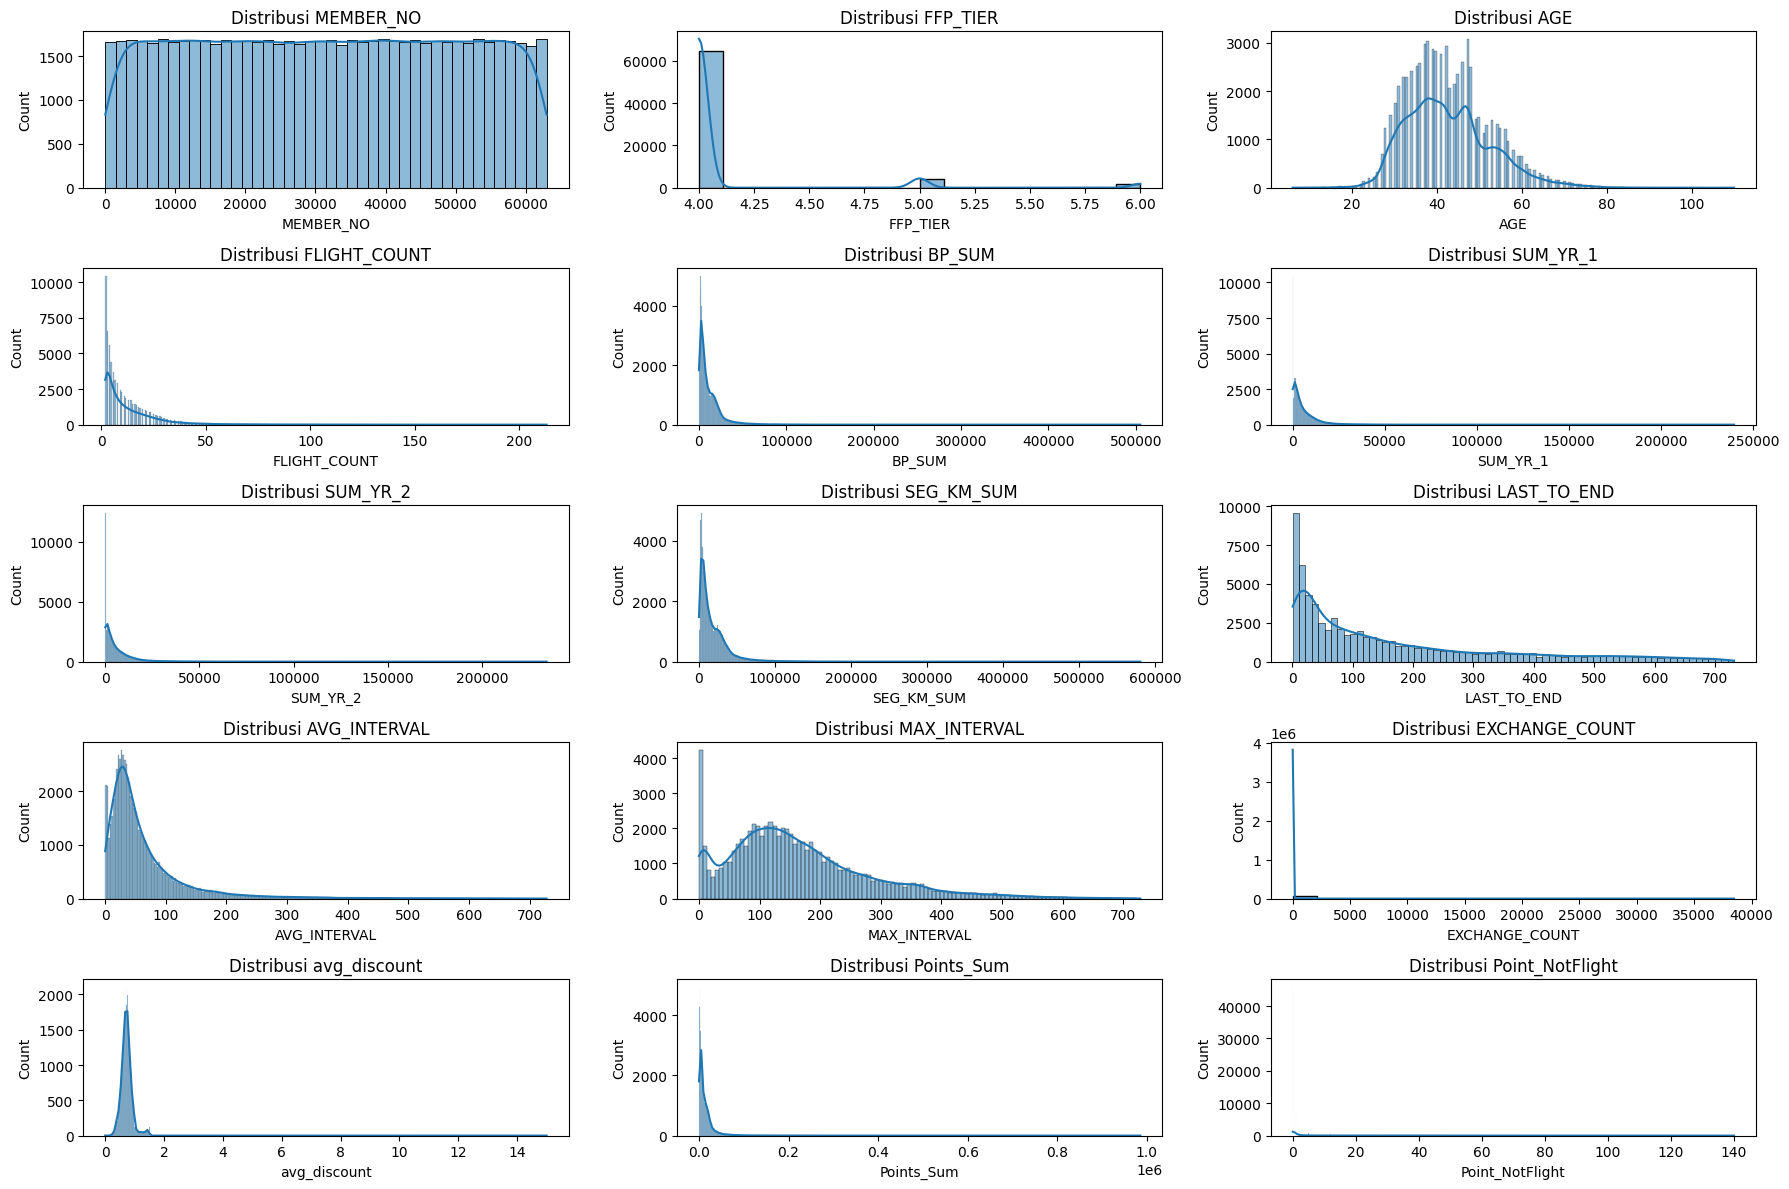

In [13]:
plt.figure(figsize=(18, 12))

num_cols = len(num.columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)
num_cols_subplot = min(3, num_cols)
for i, feature in enumerate(num.columns, 1):
    plt.subplot(num_rows, num_cols_subplot, i)
    sns.histplot(num[feature], kde=True)
    plt.title(f'Distribusi {feature}')

plt.tight_layout()
plt.show()


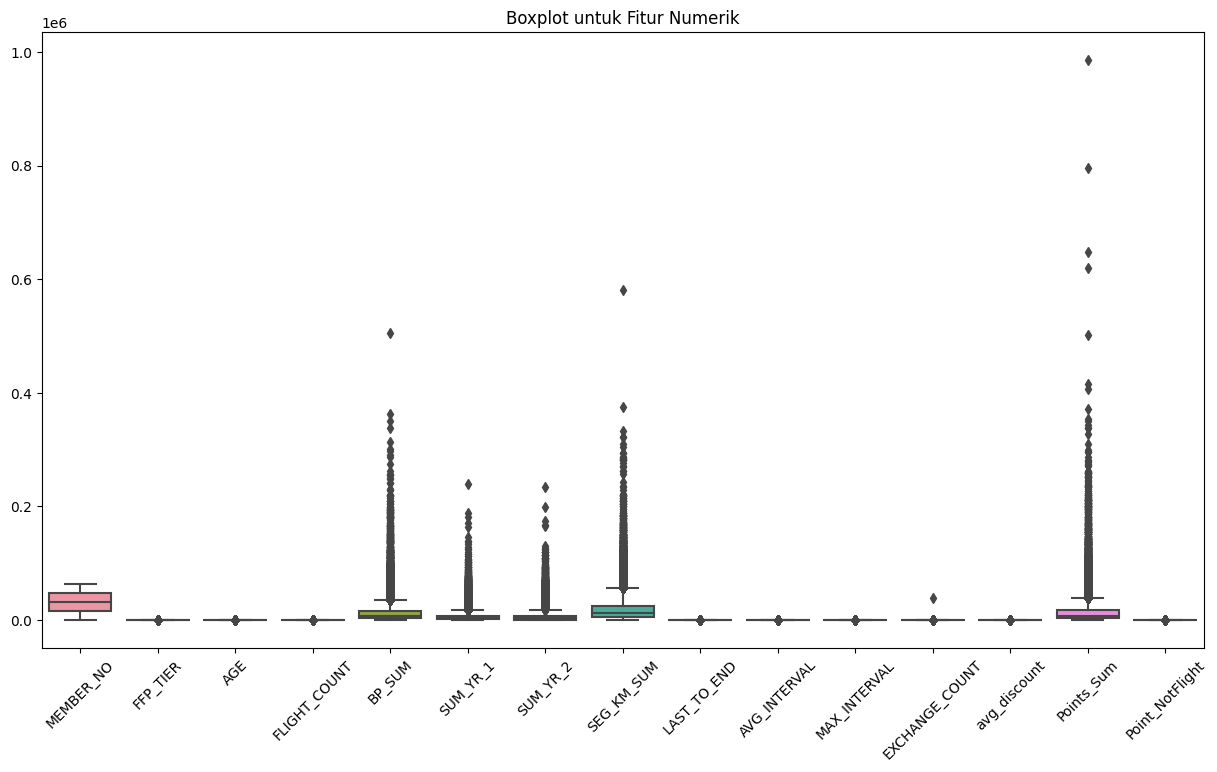

In [14]:
plt.figure(figsize=(15, 8))

sns.boxplot(data=num)
plt.title('Boxplot untuk Fitur Numerik')
plt.xticks(rotation=45)
plt.show()

#Multivariate Analysis

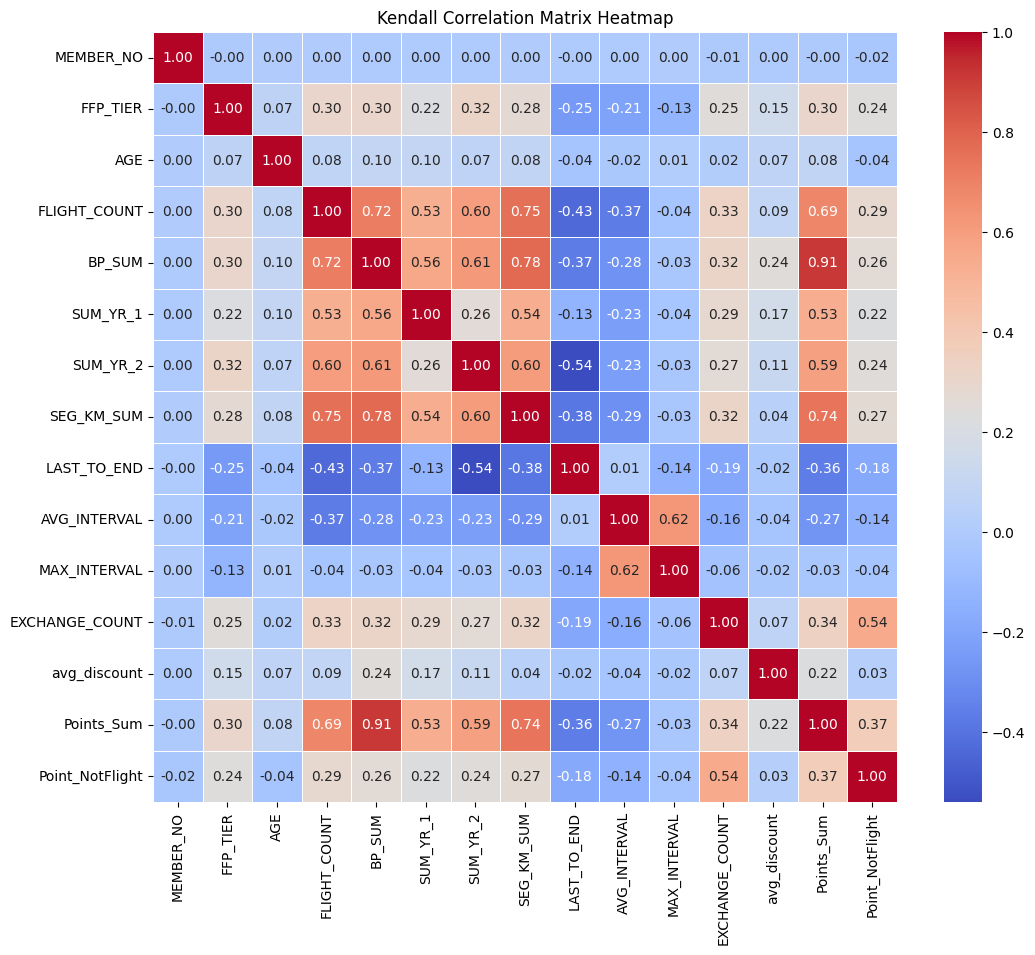

In [15]:
# Menghitung matriks korelasi Kendall
kendall_correlation_matrix = df.corr(method='kendall')

# Membuat heatmap untuk matriks korelasi Kendall
plt.figure(figsize=(12, 10))
sns.heatmap(kendall_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Kendall Correlation Matrix Heatmap')
plt.show()

#Feature Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])


#Seleksi Fitur

In [17]:
#seleksi fitur
cluster = ['AGE', 'AVG_INTERVAL', 'SEG_KM_SUM', 'EXCHANGE_COUNT', 'SUM_YR_1']
df_selected = df[cluster]
df_selected

,AGE,AVG_INTERVAL,SEG_KM_SUM,EXCHANGE_COUNT,SUM_YR_1
0,31,3.483254,580717,34,239560.000000
2,40,5.298507,283712,20,163618.000000
3,64,27.863636,281336,11,116350.000000
4,48,4.788079,309928,27,124560.000000
5,64,7.043956,294585,10,112364.000000
...,...,...,...,...,...
70040,25,4.000000,1134,1,0.000000
70041,38,37.000000,8016,14,0.000000
70042,43,166.000000,2594,0,0.000000
70043,36,12.000000,3934,0,0.000000


#Standarisasi

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_to_scale = df[cluster]
scaled_data = scaler.fit_transform(data_to_scale)
df_scaled = pd.DataFrame(scaled_data, columns=[cluster])
df_scaled.head()

,AGE,AVG_INTERVAL,SEG_KM_SUM,EXCHANGE_COUNT,SUM_YR_1
0,-1.166642,-0.817141,27.748531,0.220615,29.713857
1,-0.241899,-0.792743,13.092011,0.127223,20.065146
2,2.224080,-0.489460,12.974760,0.067186,14.059573
3,0.580094,-0.799604,14.385711,0.173919,15.102683
4,2.224080,-0.769284,13.628568,0.060515,13.553137


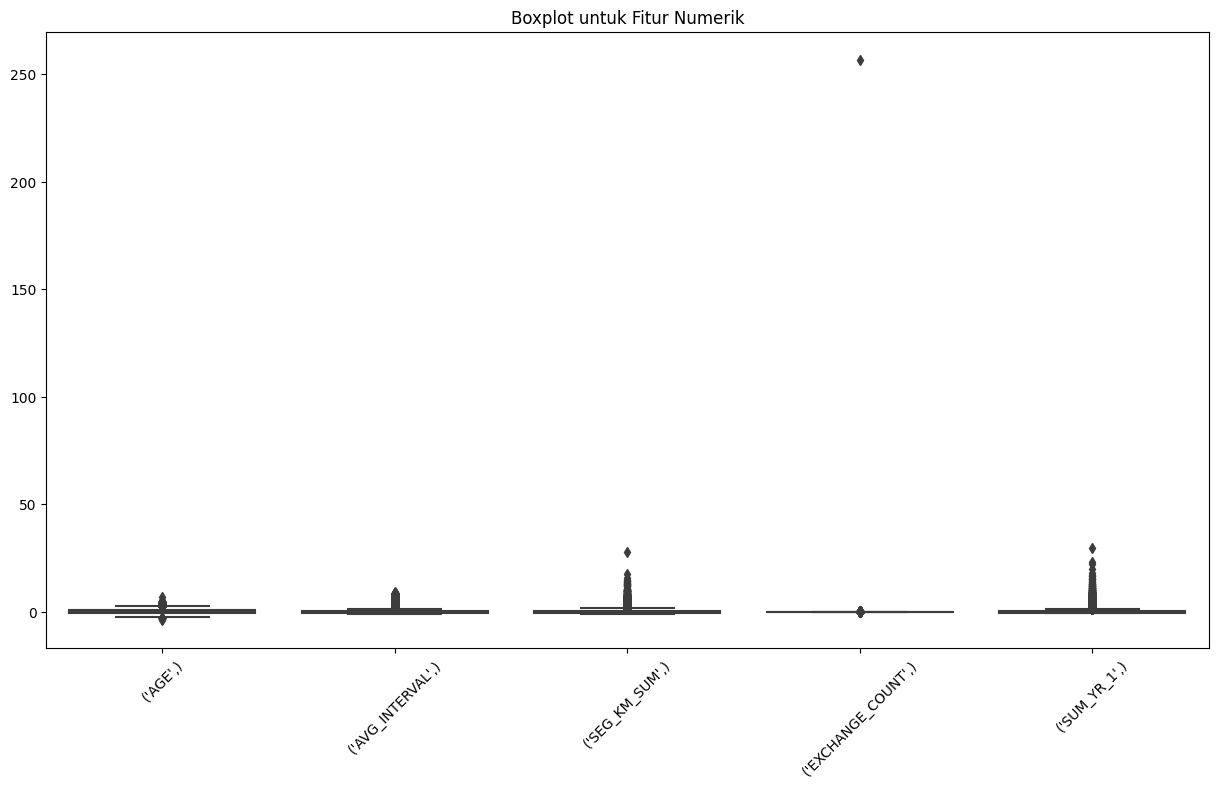

In [19]:
plt.figure(figsize=(15, 8))

sns.boxplot(data=df_scaled)
plt.title('Boxplot untuk Fitur Numerik')
plt.xticks(rotation=45)
plt.show()

#Handdling Outliers

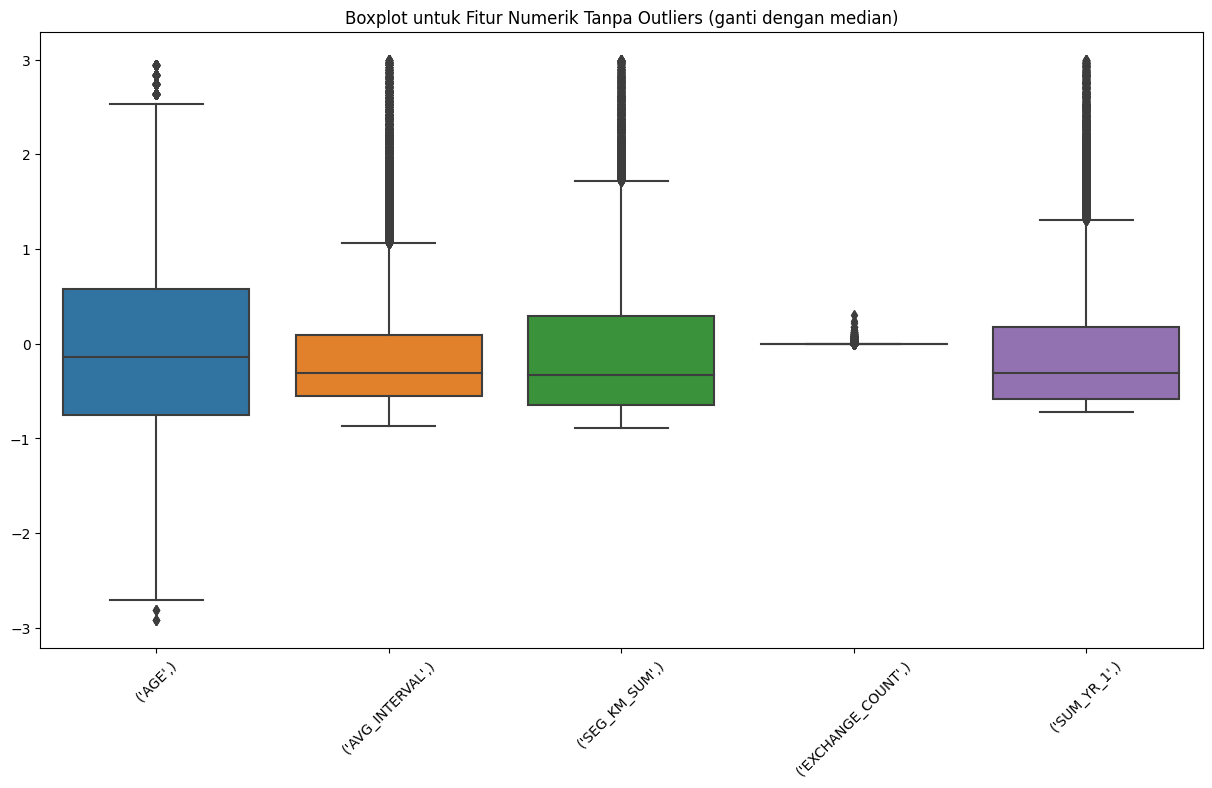

In [20]:
from scipy.stats import zscore

z_scores = np.abs(zscore(df_scaled))
threshold = 3
#ganti dengan median
median_values = np.nanmedian(df_scaled, axis=0)
df_ok = np.where(z_scores > threshold, median_values, df_scaled)
# Konversi kembali ke DataFrame
df_ok = pd.DataFrame(df_ok, columns=df_scaled.columns)

# Tampilkan visualisasi boxplot setelah handling outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_ok)
plt.title('Boxplot untuk Fitur Numerik Tanpa Outliers (ganti dengan median)')
plt.xticks(rotation=45)
plt.show()



In [21]:
df_ok.isna().sum()

AGE               0
AVG_INTERVAL      0
SEG_KM_SUM        0
EXCHANGE_COUNT    0
SUM_YR_1          0
dtype: int64

#Korelasi Lanjutan

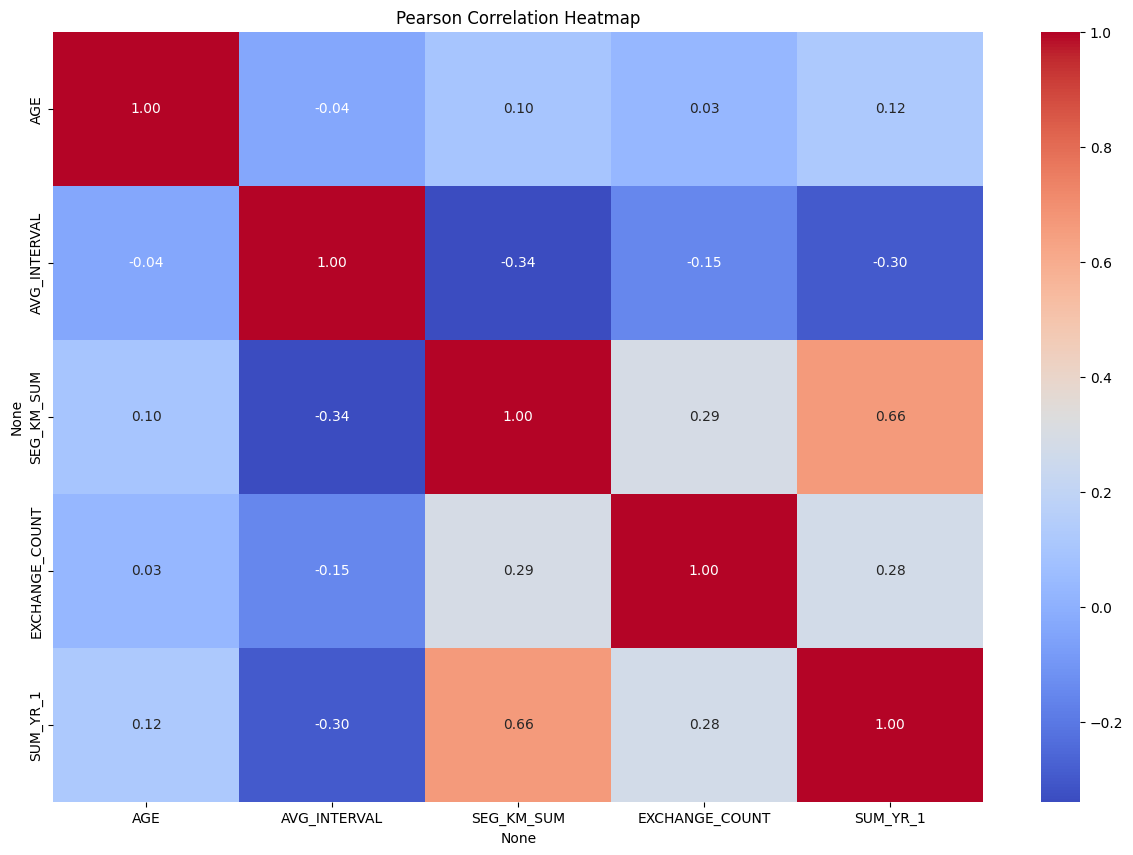

In [22]:
correlation_matrix = df_ok.corr(method='pearson')

# Plot heatmap korelasi
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap')
plt.show()

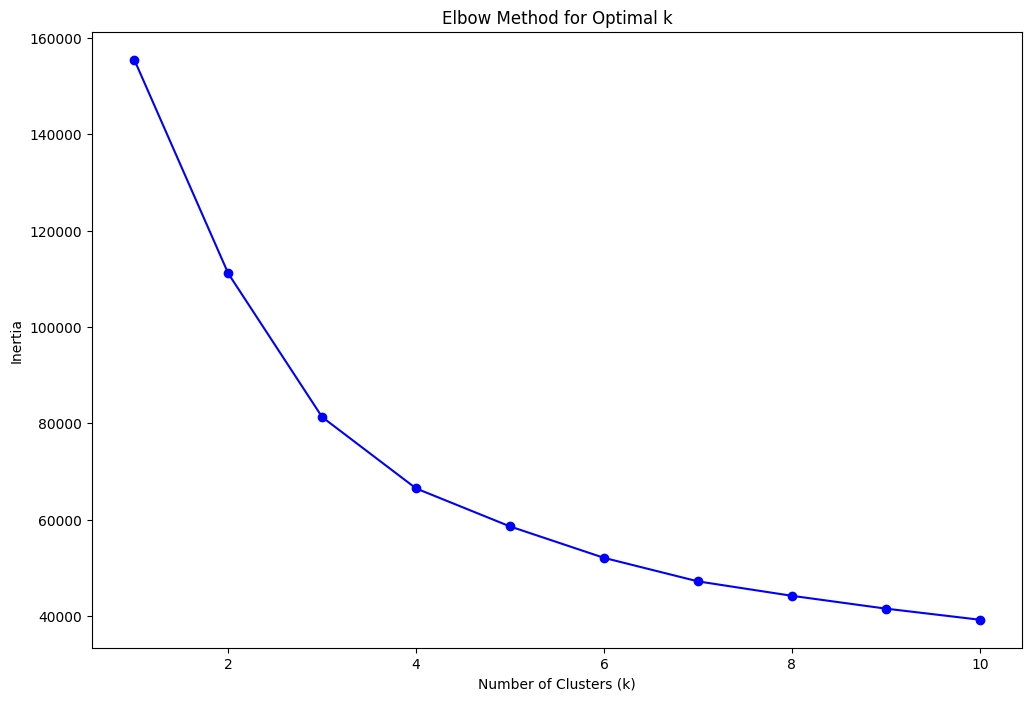

In [23]:
from sklearn.cluster import KMeans

# Mencari nilai K optimal
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_ok)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [24]:
# kemungkinan kluster optimal di 3 atau 4
optimal_k = 4

In [25]:
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit(df_ok).labels_

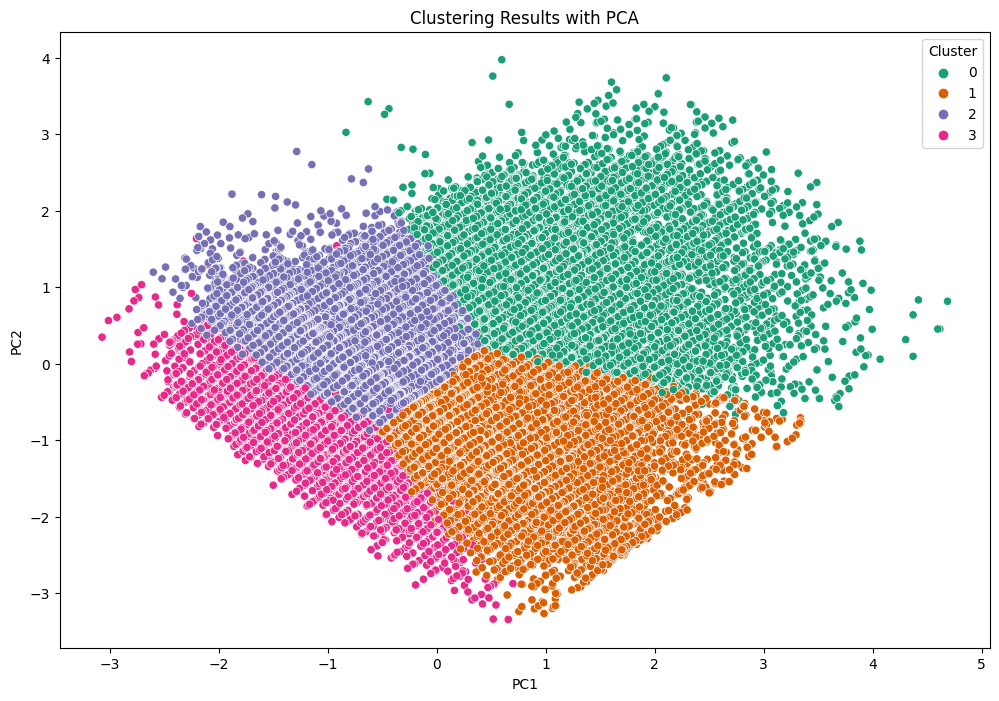

Silhouette Score: 0.31


In [26]:
from sklearn.decomposition import PCA
from sklearn import metrics

# PCA untuk mereduksi dimensi menjadi 2 komponen
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_ok), columns=['PC1', 'PC2'])

# Gabungkan hasil PCA dengan label klaster
df_pca['Cluster'] = kmeans.labels_

# Visualisasikan hasil klaster dengan scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Dark2', data=df_pca)
plt.title('Clustering Results with PCA')
plt.show()

# Evaluasi dengan silhouette score
silhouette_score = metrics.silhouette_score(df_ok, df['Cluster'])
print(f'Silhouette Score: {silhouette_score:.2f}')

#Menempelkan ke dataframe awal

In [48]:
# Menambahkan label klaster ke DataFrame awal
df['Cluster'] = kmeans.labels_

# Keluarkan statistik fitur dari setiap klaster
cluster_stats1 = df.groupby('Cluster')[['AGE']].describe()
cluster_stats2 = df.groupby('Cluster')[['AVG_INTERVAL']].describe()
cluster_stats3 = df.groupby('Cluster')[['SEG_KM_SUM']].describe()
cluster_stats4 = df.groupby('Cluster')[['EXCHANGE_COUNT']].describe()
cluster_stats5 = df.groupby('Cluster')[['SUM_YR_1']].describe()
print(cluster_stats1, cluster_stats2, cluster_stats3, cluster_stats4, cluster_stats5)

             AGE                                                    
           count       mean       std   min   25%   50%   75%    max
Cluster                                                             
0        13086.0  42.956136  7.775346  12.0  38.0  42.0  47.0   89.0
1        18407.0  52.515945  6.273672  44.0  47.0  51.0  56.0   71.0
2        26782.0  35.750392  6.341419   7.0  32.0  36.0  39.0  110.0
3         7601.0  39.978687  8.358753   6.0  34.0  39.0  45.0   92.0         AVG_INTERVAL                                                       \
               count        mean        std   min         25%         50%   
Cluster                                                                     
0            13086.0   27.373816  14.464133   2.0   18.368421   24.769231   
1            18407.0   60.075204  71.793084   0.0   26.833333   44.937500   
2            26782.0   57.050052  76.158329   0.0   23.333333   42.636364   
3             7601.0  163.482827  47.826490  87.0  124.

In [29]:
df.sample(8)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,Cluster
50235,20113,3/26/2013,4/29/2013,0,4,shamen,fujian,CN,30,3/31/2014,...,4874,1/20/2014,72,66.500000,154.0,0,0.812924,3961.0,0.0,2
5238,10526,7/18/2011,8/23/2011,1,4,guangzhou,guangdong,CN,34,3/31/2014,...,46459,3/17/2014,15,19.857143,111.0,0,0.713576,30533.0,0.0,0
48389,58884,10/18/2010,10/18/2010,1,4,beijing,beijing,CN,41,3/31/2014,...,4837,12/28/2012,460,57.500000,71.0,0,0.901675,4086.0,0.0,2
25529,57689,11/4/2008,11/7/2009,1,4,beijing,beijing,CN,47,3/31/2014,...,15749,7/20/2013,256,30.071429,102.0,1,0.842568,12796.0,1.0,1
42923,28512,1/17/2011,7/22/2012,0,4,shijiazhuang,hebei,CN,42,3/31/2014,...,13340,8/20/2012,590,29.000000,29.0,0,0.425000,6182.0,1.0,2
3707,59842,10/18/2011,11/2/2011,1,4,xinhui,guangdong,CN,35,3/31/2014,...,51091,3/11/2014,21,23.655172,99.0,0,0.779108,36003.0,0.0,0
14935,5379,11/2/2012,11/2/2012,1,4,Namyangju-si,Gyeonggi-do,KR,62,3/31/2014,...,37152,3/7/2014,25,32.733333,145.0,0,0.695000,17306.0,4.0,1
63972,37500,11/20/2010,10/30/2011,1,4,beijing,beijing,CN,32,3/31/2014,...,1868,11/28/2013,125,28.000000,28.0,0,0.924748,1741.0,0.0,2
25594,16919,11/9/2010,11/30/2010,1,4,shenyangshi,liaoningsheng,CN,32,3/31/2014,...,28872,1/18/2014,74,42.307692,143.0,0,0.457549,6957.0,0.0,2
52467,48440,7/14/2008,7/14/2008,1,4,shanghai,shanghai,CN,38,3/31/2014,...,4359,3/23/2014,9,64.000000,164.0,0,0.814597,3245.0,0.0,2


In [30]:
df['AGE'].value_counts()

47     2932
38     2914
37     2868
42     2818
39     2759
       ... 
110       1
7         1
6         1
88        1
91        1
Name: AGE, Length: 83, dtype: int64